In [ ]:
#import libraries

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
#Read Dataset

In [ ]:

import zipfile


zip_file_path = 'your_zip_file.zip'
# Create a ZipFile object
with zipfile.ZipFile('/content/archive (1).zip', 'r') as zip_ref:
    # Extract all contents of the zip file to the current directory
  zip_ref.extractall()

print(f"Zip file '/content/archive (1).zip' successfully extracted.")


Zip file '/content/archive (1).zip' successfully extracted.


# New Section

In [ ]:
df = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [ ]:
#EDA

In [ ]:
df.isnull().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [ ]:
df['holiday'].unique()

array([nan, 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [ ]:
# Convert the 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

In [ ]:
# Extract the time-related features from the 'date_time' column
df['hour'] = df['date_time'].dt.hour
df['day_of_week'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month

In [ ]:
df.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'hour',
       'day_of_week', 'month'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              61 non-null     object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
 9   hour                 48204 non-null  int32         
 10  day_of_week          48204 non-null  object        
 11  month                48204 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(2), int64(2), object(4)
memory usage: 4.0+ MB


In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,date_time,traffic_volume,hour,month
count,48204.000000,48204.000000,48204.000000,48204.000000,48204,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,2016-01-05 10:46:16.773711616,3259.818355,11.398162,6.506037
min,0.000000,0.000000,0.000000,0.000000,2012-10-02 09:00:00,0.000000,0.000000,1.000000
25%,272.160000,0.000000,0.000000,1.000000,2014-02-06 11:45:00,1193.000000,5.000000,4.000000
50%,282.450000,0.000000,0.000000,64.000000,2016-06-11 03:30:00,3380.000000,11.000000,7.000000
75%,291.806000,0.000000,0.000000,90.000000,2017-08-11 06:00:00,4933.000000,17.000000,9.000000
max,310.070000,9831.300000,0.510000,100.000000,2018-09-30 23:00:00,7280.000000,23.000000,12.000000
std,13.338232,44.789133,0.008168,39.015750,NaN,1986.860670,6.940238,3.400221


In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,Tuesday,10
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,Tuesday,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,Tuesday,10
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,Tuesday,10
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,Tuesday,10


In [ ]:
#Data Visualization

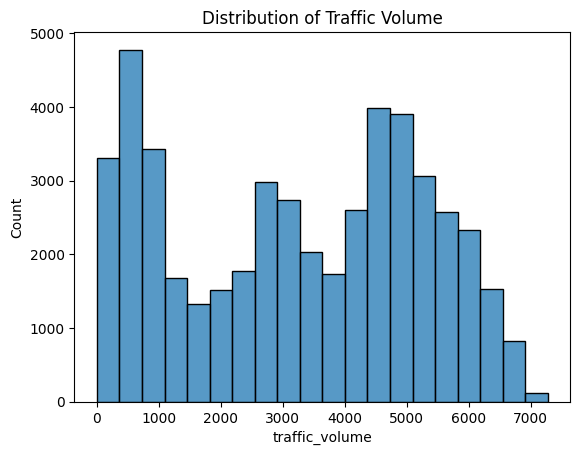

In [ ]:
sns.histplot(df['traffic_volume'], bins=20)
plt.title('Distribution of Traffic Volume')
plt.show()

In [ ]:
# the average traffic volume
df['traffic_volume'].mean()

3259.8183553232097

In [ ]:
# correlation
df[['temp', 'traffic_volume']].corr()

,temp,traffic_volume
temp,1.000000,0.130299
traffic_volume,0.130299,1.000000


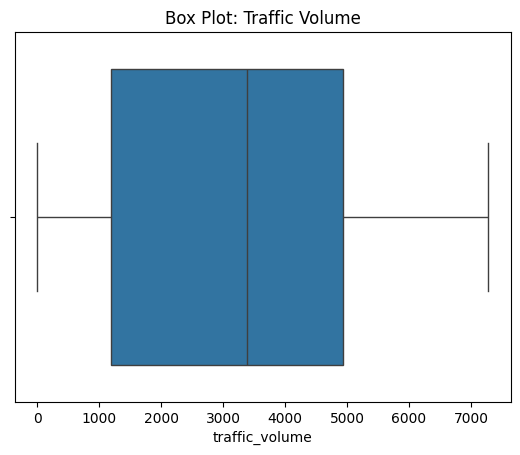

Number of Outliers: 0
Empty DataFrame
Columns: [holiday, temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description, date_time, traffic_volume, hour, day_of_week, month]
Index: []


In [ ]:
# outliers
from scipy import stats
sns.boxplot(x=df['traffic_volume'])
plt.title('Box Plot: Traffic Volume')
plt.show()

# Identify outliers using Z-score
z_scores = np.abs(stats.zscore(df['traffic_volume']))
outliers = df[(z_scores >= 3) | (z_scores <= -3)]

# Print or analyze the outliers as needed
print(f'Number of Outliers: {len(outliers)}')
print(outliers);

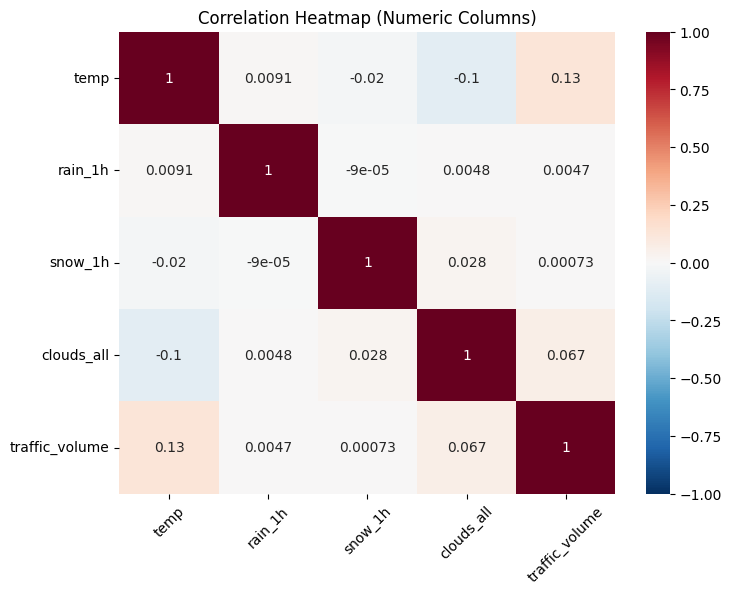

In [ ]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for the numeric columns
corr_matrix = df[num_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour,day_of_week,month
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9,Tuesday,10
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,Tuesday,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11,Tuesday,10
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12,Tuesday,10
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13,Tuesday,10


In [ ]:
df['holiday'] = df['holiday'].fillna('no_holiday')

In [ ]:
df['holiday'].unique()

array(['no_holiday', 'Columbus Day', 'Veterans Day', 'Thanksgiving Day',
       'Christmas Day', 'New Years Day', 'Washingtons Birthday',
       'Memorial Day', 'Independence Day', 'State Fair', 'Labor Day',
       'Martin Luther King Jr Day'], dtype=object)

In [ ]:
df['holiday'].isnull().sum()

0

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

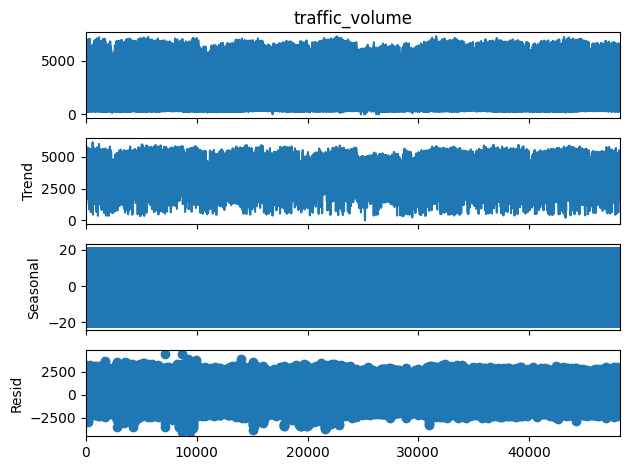

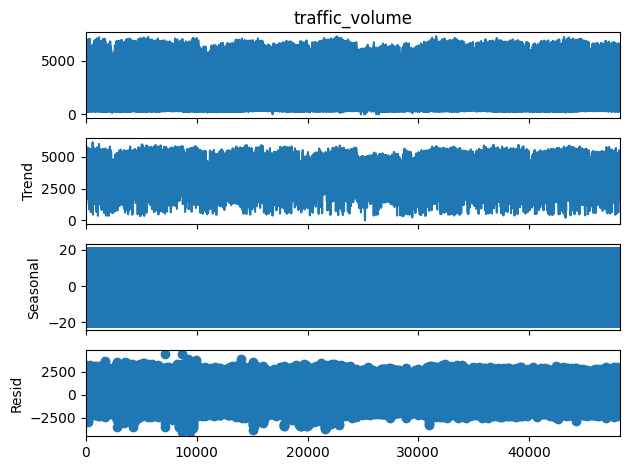

In [ ]:
#result = seasonal_decompose(df['traffic_volume'], model='additive')
decomposition = seasonal_decompose(df['traffic_volume'], model='additive', period=12)
decomposition.plot()

In [ ]:
#from statsmodels.tsa.deterministic import DeterministicProcess


In [ ]:
print(df.columns)

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'hour',
       'day_of_week', 'month'],
      dtype='object')


<ipython-input-28-01c9ee634ac9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_month'] = df_filtered['date_time'].dt.to_period('M')


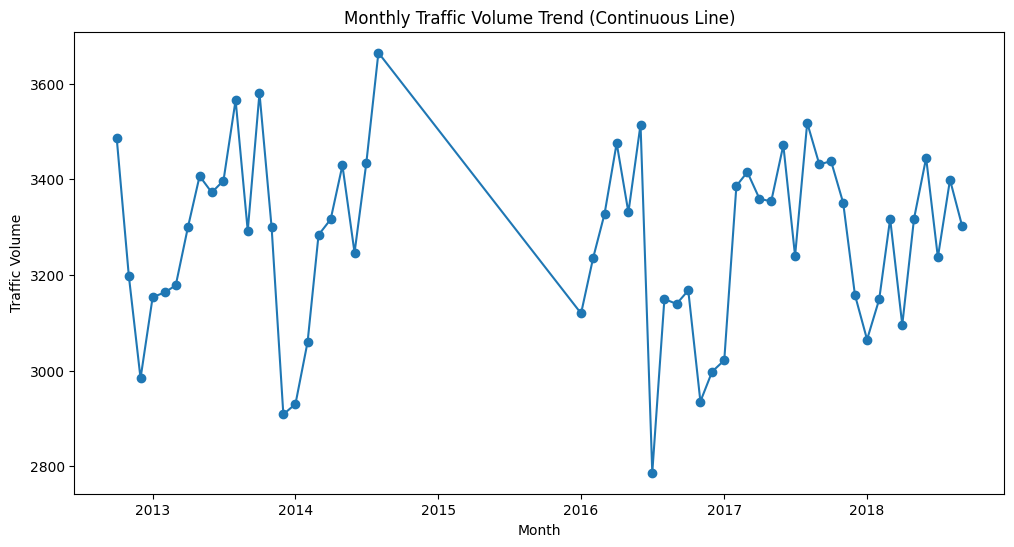

In [ ]:
# Drop rows for the year 2015
# Drop rows for the year 2015 (if 'date_time' column exists)
if 'date_time' in df.columns:
   df_filtered = df[df['date_time'].dt.year != 2015]

# Group by year and month, then calculate the mean of traffic_volume
   df_filtered['year_month'] = df_filtered['date_time'].dt.to_period('M')
   df_grouped = df_filtered.groupby('year_month')['traffic_volume'].mean().reset_index()

# Convert 'year_month' back to a datetime format for plotting
   df_grouped['year_month'] = df_grouped['year_month'].dt.to_timestamp()
 # Plotting the continuous line plot

   plt.figure(figsize=(12, 6))

   plt.plot(df_grouped['year_month'], df_grouped['traffic_volume'], marker='o', linestyle='-')

plt.title('Monthly Traffic Volume Trend (Continuous Line)')

plt.xlabel('Month')

plt.ylabel('Traffic Volume')

plt.show()


### **GRU**

In [ ]:
print(df.columns)

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume', 'hour',
       'day_of_week', 'month'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# We will use the 'Traffic Volume' column as our target variable

data = df[['traffic_volume']]

#normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [ ]:
data[:5].values

array([[5545],
       [4516],
       [4767],
       [5026],
       [4918]])

In [ ]:
scaled_data[:5]

array([[0.76167582],
       [0.62032967],
       [0.65480769],
       [0.69038462],
       [0.67554945]])

In [ ]:
# Create sequences for the GRU model
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)


#setting the sequence length to 20
sequence_length = 20
x, y = create_sequences(scaled_data, sequence_length)

In [ ]:
x.shape, y.shape

((48184, 20), (48184,))

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [ ]:
x.shape

(48184, 20, 1)

In [ ]:
#split the data into training and test sets
split = int(0.8 * len(x))

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
x_train.shape, y_train.shape

((38547, 20, 1), (38547,))

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

In [ ]:
#building the model
model =Sequential([
    GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])
model.summary()
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 20, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,551 (95.90 KB)

 Trainable params: 24,551 (95.90 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0227 - val_loss: 0.0057
Epoch 2/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - loss: 0.0089 - val_loss: 0.0053
Epoch 3/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0083 - val_loss: 0.0054
Epoch 4/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0076 - val_loss: 0.0045
Epoch 5/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0070 - val_loss: 0.0047
Epoch 6/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0067 - val_loss: 0.0036
Epoch 7/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0060 - val_loss: 0.0038
Epoch 8/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0058 - val_loss: 0.0040
Epoch 9/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0058 - val_loss: 0.0034
Epoch 10/10
1205/1205 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0058 - val_loss: 0.0034


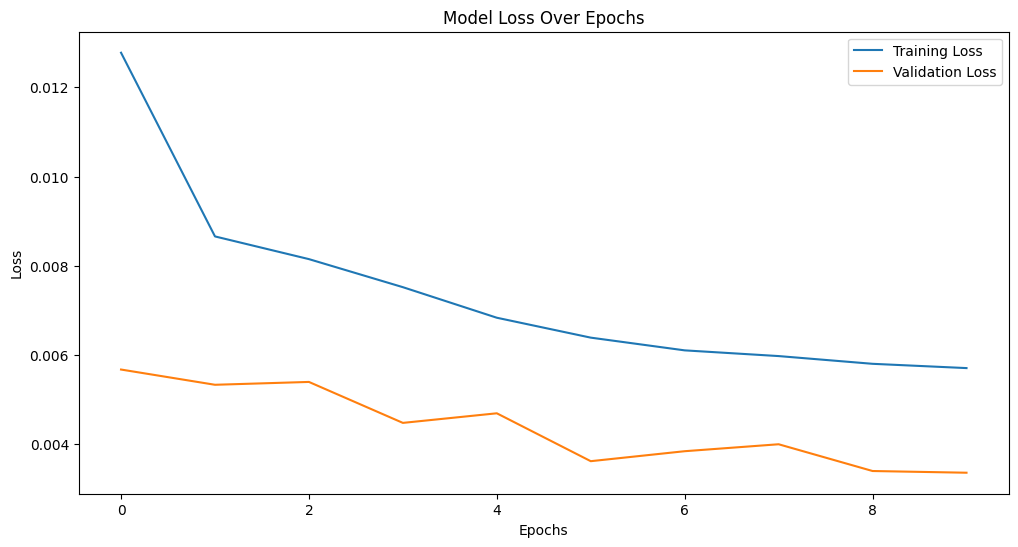

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#make predictions
predicted_traffic_vol = model.predict(x_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
# Calculate the loss (e.g., Mean Squared Error) for the first 500 data points
loss = mean_squared_error(predicted_traffic_vol, y_test_actual)
print("Loss (MSE) for the first 500 data points:",loss)

Loss (MSE) for the first 500 data points: 6.14305694519001e+45


In [ ]:
#inverse transorm to get actual traffic volume
predicted_traffic_vol=scaler.inverse_transform(predicted_traffic_vol.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(predicted_traffic_vol, y_test_actual))
print(f'RMSE: {rmse}')

RMSE: 5.705893352558337e+26


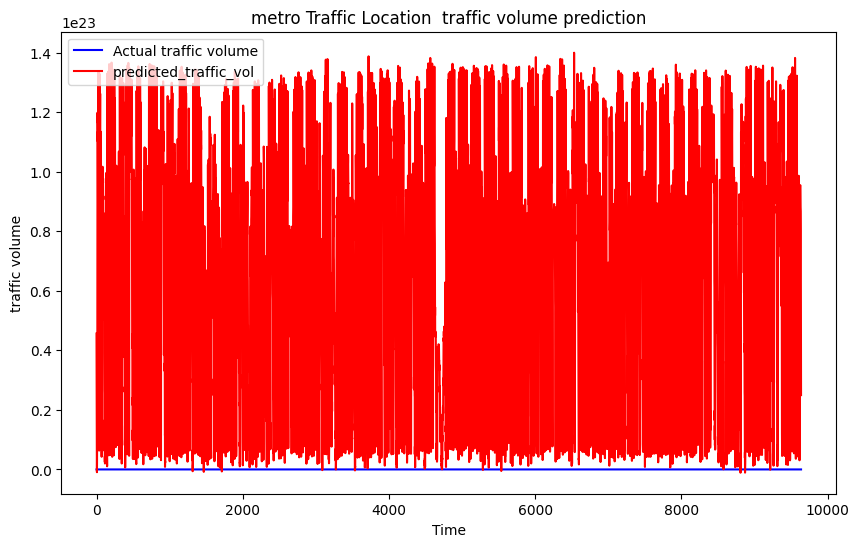

In [ ]:
#inverse transorm to get actual traffic volume
predicted_traffic_vol=scaler.inverse_transform(predicted_traffic_vol.reshape(-1,1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


# Plot the results
import matplotlib.pyplot as plt

# Define the ticker or name here
ticker = "metro Traffic Location "

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual traffic volume')
plt.plot(predicted_traffic_vol, color='red', label='predicted_traffic_vol')
plt.title(f'{ticker} traffic volume prediction')
plt.xlabel('Time')
plt.ylabel('traffic volume')
plt.legend()
plt.show()